# CT 복원영상에서 폐, 기도, 심장을 가이드해주는 딥러닝 모델 만들기

## 1. CT이미지 데이터셋 살펴보기

In [1]:
import os
import pandas as pd

In [2]:
data_dir = "../DATASET/Segmentation/"
data_df = pd.read_csv(os.path.join(data_dir, "train.csv"))
data_df.head()

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg


In [3]:
data_df.shape

(16708, 2)

In [23]:
data_df.head(50)

,ImageId,MaskId,Id
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg,ID00007637202177411956430
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg,ID00007637202177411956430
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg,ID00007637202177411956430
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg,ID00007637202177411956430
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg,ID00007637202177411956430
5,ID00007637202177411956430_5.jpg,ID00007637202177411956430_mask_5.jpg,ID00007637202177411956430
6,ID00007637202177411956430_6.jpg,ID00007637202177411956430_mask_6.jpg,ID00007637202177411956430
7,ID00007637202177411956430_7.jpg,ID00007637202177411956430_mask_7.jpg,ID00007637202177411956430
8,ID00007637202177411956430_8.jpg,ID00007637202177411956430_mask_8.jpg,ID00007637202177411956430
9,ID00007637202177411956430_9.jpg,ID00007637202177411956430_mask_9.jpg,ID00007637202177411956430


In [24]:
def extract_client_id(x):
    return x.split("_")[0]

data_df['Id']= data_df.ImageId.apply(lambda x:extract_client_id(x))

In [25]:
data_df

,ImageId,MaskId,Id
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg,ID00007637202177411956430
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg,ID00007637202177411956430
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg,ID00007637202177411956430
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg,ID00007637202177411956430
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg,ID00007637202177411956430
...,...,...,...
16703,ID00426637202313170790466_403.jpg,ID00426637202313170790466_mask_403.jpg,ID00426637202313170790466
16704,ID00426637202313170790466_404.jpg,ID00426637202313170790466_mask_404.jpg,ID00426637202313170790466
16705,ID00426637202313170790466_405.jpg,ID00426637202313170790466_mask_405.jpg,ID00426637202313170790466
16706,ID00426637202313170790466_406.jpg,ID00426637202313170790466_mask_406.jpg,ID00426637202313170790466


In [6]:
import numpy as np

In [26]:
client_ids = np.unique(data_df.Id.values)
print(len(client_ids))

112


In [27]:
client_ids

array(['ID00007637202177411956430', 'ID00009637202177434476278',
       'ID00010637202177584971671', 'ID00012637202177665765362',
       'ID00014637202177757139317', 'ID00015637202177877247924',
       'ID00019637202178323708467', 'ID00025637202179541264076',
       'ID00027637202179689871102', 'ID00032637202181710233084',
       'ID00035637202182204917484', 'ID00047637202184938901501',
       'ID00048637202185016727717', 'ID00051637202185848464638',
       'ID00060637202187965290703', 'ID00061637202188184085559',
       'ID00068637202190879923934', 'ID00072637202198161894406',
       'ID00073637202198167792918', 'ID00075637202198610425520',
       'ID00076637202199015035026', 'ID00077637202199102000916',
       'ID00082637202201836229724', 'ID00089637202204675567570',
       'ID00090637202204766623410', 'ID00094637202205333947361',
       'ID00102637202206574119190', 'ID00104637202208063407045',
       'ID00105637202208831864134', 'ID00109637202210454292264',
       'ID001106372022106

In [28]:
import cv2
import matplotlib.pyplot as plt

In [29]:
index = 0
client_data = data_df[data_df.Id == client_ids[index]][["ImageId", "MaskId"]]

In [30]:
client_data
# jpg 파일은 손실압축 방식으로 픽셀간의 근접부분이 어그러질수 있어 X
# png 아니면 array형태로 사용해야함

,ImageId,MaskId
0,ID00007637202177411956430_0.jpg,ID00007637202177411956430_mask_0.jpg
1,ID00007637202177411956430_1.jpg,ID00007637202177411956430_mask_1.jpg
2,ID00007637202177411956430_2.jpg,ID00007637202177411956430_mask_2.jpg
3,ID00007637202177411956430_3.jpg,ID00007637202177411956430_mask_3.jpg
4,ID00007637202177411956430_4.jpg,ID00007637202177411956430_mask_4.jpg
5,ID00007637202177411956430_5.jpg,ID00007637202177411956430_mask_5.jpg
6,ID00007637202177411956430_6.jpg,ID00007637202177411956430_mask_6.jpg
7,ID00007637202177411956430_7.jpg,ID00007637202177411956430_mask_7.jpg
8,ID00007637202177411956430_8.jpg,ID00007637202177411956430_mask_8.jpg
9,ID00007637202177411956430_9.jpg,ID00007637202177411956430_mask_9.jpg


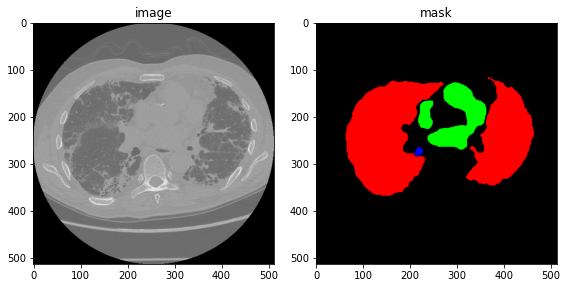

In [31]:
sub_index = 16
img_name, mask_name = client_data.iloc[sub_index].values
img_path, mask_path = os.path.join(data_dir, "images", img_name), os.path.join(data_dir, "masks", mask_name)
image = cv2.imread(img_path)
mask = cv2.imread(mask_path)
thres = 240
mask[mask < thres] = 0
mask[mask >= thres] = 255

plt.figure(figsize=(8,6))
plt.subplot(121)
plt.title("image")
plt.imshow(image)
plt.subplot(122)
plt.title("mask")
plt.imshow(mask)
plt.tight_layout()

In [32]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [33]:
mask.shape # 3채널 RGB가 아니라 폐 심장 기도를 나타내는 feature개수

(512, 512, 3)

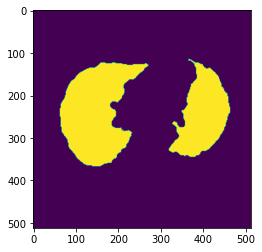

In [34]:
plt.imshow(mask[...,0]) #폐

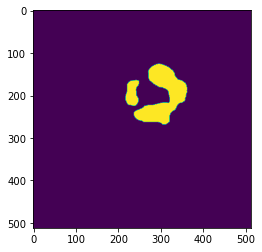

In [35]:
plt.imshow(mask[...,1]) # 심장

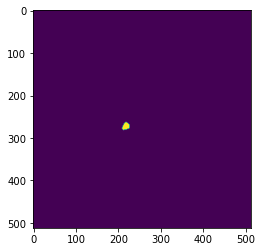

In [36]:
plt.imshow(mask[...,2]) # 기도

In [38]:
def get_client_data(data_df, index):
    client_ids = np.unique(data_df.Id.values)
    client_id = client_ids[index]
    client_data = data_df[data_df.Id == client_id]
    image_files = list(client_data["ImageId"])
    mask_files = list(client_data["MaskId"])
    return client_id, image_files, mask_files

In [39]:
regions = ["background", "trachea", "heart", "lung"]
# segmantation은 background 있음
colors = ((0,0,0), (255, 0, 0), (0, 255, 0), (0, 0, 255)) # B G R

In [40]:
index = 1
client_id, image_files, mask_files = get_client_data(data_df, index)

In [41]:
client_id

'ID00009637202177434476278'

In [102]:
index = 0
client_id, image_files, mask_files = get_client_data(data_df, index)

canvas = np.zeros(shape=(512, 2*512+50, 3), dtype=np.uint8)
for i in range(len(image_files)):
    image = cv2.imread(os.path.join(data_dir, "images", image_files[i]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    mask = cv2.imread(os.path.join(data_dir, "masks", mask_files[i]))
    mask = cv2.cvtColor(mask, cv2.COLOR_BGR2RGB)
    thres = 240
    mask[mask < thres] = 0
    mask[mask >= thres] = 255
    grid_pad = 50
    
    canvas[:, :512, :] = image
    canvas[:, 512+grid_pad:2*512+grid_pad, :] = mask
    
    text_buff = 410
    for j in range(1, len(regions)):
        cv2.putText(canvas, f'{regions[j].upper()}', (900, text_buff), cv2.FONT_HERSHEY_SIMPLEX, 1, colors[j], 2)
        text_buff += 40
    
    cv2.imshow('CT frames', canvas)
    key = cv2.waitKey(60)
    if key == 27:
        break
cv2.destroyAllWindows()

error: OpenCV(4.7.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


## 2. 데이터셋 구축과 연산을 위한 텐서변환 모듈 작성하기

In [43]:
import torch

In [44]:
data_dir = "../DATASET/Segmentation/"

# data_dir
# ㄴ train
#     ㄴimages = *jpg
#     ㄴmasks = *jpg
# ㄴ val
#     ㄴimages = *.jpg
#     ㄴmasks = *.jpg

In [103]:
class CT_dataset():
    def __init__(self, data_dir, phase, transformer=None):
        self.phase = phase
        self.images_dir = os.path.join(data_dir, phase, "images")
        self.masks_dir = os.path.join(data_dir, phase, "masks")
        self.image_files = [filename for filename in os.listdir(self.images_dir) if filename.endswith("jpg")]
        self.mask_files = [filename for filename in os.listdir(self.masks_dir) if filename.endswith("jpg")]
        assert len(self.image_files) == len(self.mask_files)
        
        self.transformer = transformer
    
    def __len__(self):
        return len(self.image_files)
    
    def __getitem__(self, index):
        image = cv2.imread(os.path.join(self.images_dir, self.image_files[index]))
        image = cv2.resize(image, dsize=(IMAGE_SIZE,IMAGE_SIZE), interpolation=cv2.INTER_LINEAR)
        mask = cv2.imread(os.path.join(self.masks_dir, self.mask_files[index]))
        mask = cv2.resize(mask, dsize=(IMAGE_SIZE,IMAGE_SIZE), interpolation=cv2.INTER_NEAREST)
        mask[mask < 240] = 0
        mask[mask >= 240] = 255
        mask = mask / 255
        
        mask_H, mask_W, mask_C = mask.shape
        background = np.ones(shape=(mask_H, mask_W))
        background[mask[...,0] != 0] = 0
        background[mask[...,1] != 0] = 0
        background[mask[...,2] != 0] = 0
        mask = np.concatenate([np.expand_dims(background, -1), mask], axis=-1)
        mask = np.argmax(mask, axis=-1)
        
        if self.transformer:
            image = self.transformer(image)
        target = torch.from_numpy(mask).long()
        return image, target

In [46]:
IMAGE_SIZE = 224

In [47]:
from torchvision import transforms

In [48]:
def build_transformer():
    transformer = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
    return transformer

In [104]:
def collate_fn(batch):
    images = []
    targets = []
    for a, b in batch: 
        images.append(a)
        targets.append(b)
    images = torch.stack(images, dim=0) 
    targets = torch.stack(targets, dim=0)

    return images, targets

In [105]:
data_dir = "../DATASET/Segmentation/"
transformer = build_transformer()
dset = CT_dataset(data_dir=data_dir, phase="train", transformer=transformer)

In [92]:
from torch.utils.data import DataLoader

In [106]:
dloader = DataLoader(dset, batch_size=4, shuffle=True, collate_fn=collate_fn)
dloader

In [107]:
for index, batch in enumerate(dloader):
    images = batch[0]
    targets = batch[1]
    print(f"images.shape: {images.shape}")
    print(f"targets.shape: {targets.shape}")
    
    if index == 0:
        break

# imges.shape = (B,C,H,W)

images.shape: torch.Size([4, 3, 224, 224])
targets.shape: torch.Size([4, 224, 224])


In [108]:
def build_dataloader(data_dir, batch_size=4):
    transformer = build_transformer()
    
    dataloaders = {}
    train_dataset = CT_dataset(data_dir=data_dir, phase="train", transformer=transformer)
    dataloaders["train"] = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, collate_fn=collate_fn)

    val_dataset = CT_dataset(data_dir=data_dir, phase="val", transformer=transformer)
    dataloaders["val"] = DataLoader(val_dataset, batch_size=1, shuffle=False, collate_fn=collate_fn)
    return dataloaders

In [109]:
data_dir = "../DATASET/Segmentation/"
dataloaders = build_dataloader(data_dir=data_dir)

for phase in ["train", "val"]:
    for index, batch in enumerate(dataloaders[phase]):
        images = batch[0]
        targets = batch[1]
        print(f"images shape: {images.shape}")
        print(f"targets shape: {targets.shape}")
        
        if index == 0:
            break

images shape: torch.Size([4, 3, 224, 224])
targets shape: torch.Size([4, 224, 224])
images shape: torch.Size([1, 3, 224, 224])
targets shape: torch.Size([1, 224, 224])


## 3. U-Net 데이터 아키텍처 구현해보기

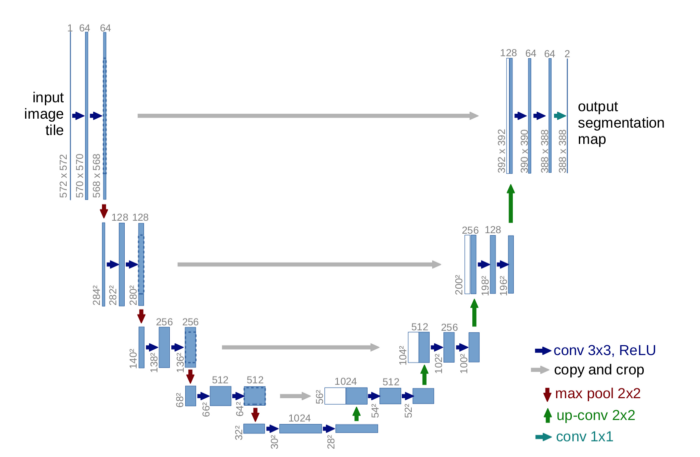
그림 출처: https://towardsdatascience.com/unet-line-by-line-explanation-9b191c76baf5

In [54]:
import torch
import torch.nn as nn

In [55]:
def ConvLayer(in_channels, out_channels):
    layers = nn.Sequential(
        nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
        
        nn.Conv2d(out_channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    )
    return layers

In [56]:
class Encoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = ConvLayer(in_channels=3, out_channels=64)
        self.conv_block2 = ConvLayer(in_channels=64, out_channels=128)
        self.conv_block3 = ConvLayer(in_channels=128, out_channels=256)
        self.conv_block4 = ConvLayer(in_channels=256, out_channels=512)
        self.conv_block5 = ConvLayer(in_channels=512, out_channels=1024)
        self.pool = nn.MaxPool2d(kernel_size=2)
        
    def forward(self, x):
        encode_features = []
        out = self.conv_block1(x)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block2(out)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block3(out)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block4(out)
        encode_features.append(out)
        out = self.pool(out)
        
        out = self.conv_block5(out)
        return out, encode_features

In [57]:
encoder = Encoder()
x = torch.randn(1, 3, 224, 224)
out, ftrs = encoder(x)

In [58]:
for ftr in ftrs:
    print(ftr.shape)
print(out.shape)

torch.Size([1, 64, 224, 224])
torch.Size([1, 128, 112, 112])
torch.Size([1, 256, 56, 56])
torch.Size([1, 512, 28, 28])
torch.Size([1, 1024, 14, 14])


In [59]:
def UpConvLayer(in_channels, out_channels):
    layers = nn.Sequential(
        nn.ConvTranspose2d(in_channels, out_channels, kernel_size=2, stride=2),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True)
    )
    return layers

In [60]:
class Decoder(nn.Module):
    def __init__(self):
        super().__init__()
        self.upconv_layer1 = UpConvLayer(in_channels=1024, out_channels=512)
        self.conv_block1 = ConvLayer(in_channels=512+512, out_channels=512)
        
        self.upconv_layer2 = UpConvLayer(in_channels=512, out_channels=256)
        self.conv_block2 = ConvLayer(in_channels=256+256, out_channels=256)
        
        self.upconv_layer3 = UpConvLayer(in_channels=256, out_channels=128)
        self.conv_block3 = ConvLayer(in_channels=128+128, out_channels=128)
        
        self.upconv_layer4 = UpConvLayer(in_channels=128, out_channels=64)
        self.conv_block4 = ConvLayer(in_channels=64+64, out_channels=64)
        
    def forward(self, x, encoder_features):
        out = self.upconv_layer1(x)
        croped_enc_feature = self._center_crop(encoder_features[-1], out.shape[2:])
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block1(out)
        
        out = self.upconv_layer2(out)
        croped_enc_feature = self._center_crop(encoder_features[-2], out.shape[2:])
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block2(out)
        
        out = self.upconv_layer3(out)
        croped_enc_feature = self._center_crop(encoder_features[-3], out.shape[2:])#(B,F,H,W)
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block3(out)
        
        out = self.upconv_layer4(out)
        croped_enc_feature = self._center_crop(encoder_features[-4], out.shape[2:])
        out = torch.cat([out, croped_enc_feature], dim=1)
        out = self.conv_block4(out)
        return out
        
    def _center_crop(self, encoder_feature, decoder_feature_size):
        croped_features = transforms.CenterCrop(size=decoder_feature_size)(encoder_feature)
        return croped_features

In [61]:
encoder = Encoder()
decoder = Decoder()
x = torch.randn(1, 3, 224, 224)
out, ftrs = encoder(x)
out = decoder(out, ftrs)

In [62]:
print(out.shape)

torch.Size([1, 64, 224, 224])


In [63]:
import torch.nn.functional as F

In [64]:
class UNet(nn.Module):
    def __init__(self, num_classes, retain_input_dim=True):
        super().__init__()
        self.encoder = Encoder()
        self.decoder = Decoder()
        self.head = nn.Conv2d(64, num_classes, kernel_size=1)
        self.retain_input_dim = retain_input_dim
        
    def forward(self, x):
        out, encode_features = self.encoder(x)
        out = self.decoder(out, encode_features)
        out = self.head(out)
        if self.retain_input_dim:
            _, _, H, W = x.shape
            out = F.interpolate(out, size=(H,W))
        return out

In [65]:
model = UNet(num_classes=4) # Background , lung, trecha, heart = 4 
x = torch.randn(1, 3, 224, 224)
out = model(x)
print(f"input shape: {x.shape}")
print(f"output shape: {out.shape}")

input shape: torch.Size([1, 3, 224, 224])
output shape: torch.Size([1, 4, 224, 224])


## 4. Dice similarity coefficient 설명 및 구현하기

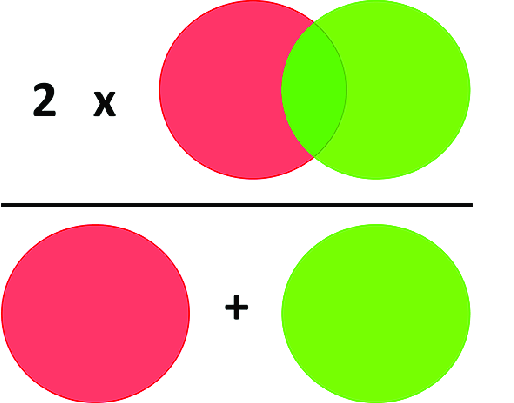
그림 출처: https://www.researchgate.net/figure/Scheme-to-explain-how-Dice-coefficient-is-calculated-The-light-red-and-light-green_fig4_352895635

### Dice similarity coefficient(DSC) == F1 score? YES only if binary segmentation task!

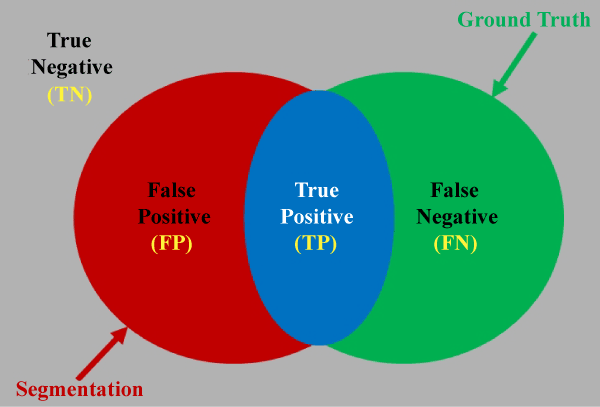
그림 출처: https://www.omicsonline.org/articles-images/JCSB-07-209-g003.html

### What is Dice coefficient loss or Dice loss? Dice loss = 1 - DSC

In [110]:
# dice loss = 1 - DSC

for index, batch in enumerate(dataloaders["train"]):
    images = batch[0]
    targets = batch[1]
    predictions = model(images)
    
    if index ==0:
        break

In [67]:
targets.shape

torch.Size([4, 224, 224])

In [68]:
predictions.shape

torch.Size([4, 4, 224, 224])

In [69]:
num_classes = 4

predictions_ = torch.argmax(predictions, dim=1)
print("predictions_.shape",predictions_.shape)

predictions_.shape torch.Size([4, 224, 224])


In [71]:
onehot_pred = F.one_hot(predictions_, num_classes = num_classes)
onehot_pred.shape # class_index = 가져온 데이터에 [0,1,2,3] 총 4개의 컬럼(디멘젼) 있음

torch.Size([4, 224, 224, 4])

In [72]:
onehot_pred =F.one_hot(predictions_, num_classes=num_classes).permute(0, 3, 1, 2)
onehot_target = F.one_hot(targets, num_classes=num_classes).permute(0, 3, 1, 2)

print(onehot_pred.shape)
print(onehot_target.shape)

torch.Size([4, 4, 224, 224])
torch.Size([4, 4, 224, 224])


In [75]:
onehot_pred_ = onehot_pred[0]
onehot_target_ = onehot_target[0]

dice_coeff = 0
for class_index in range(1, num_classes): #0은 백그라운드이므로 1부터 진행
    a = onehot_pred_[class_index]
    b = onehot_target_[class_index]
    set_inter = torch.dot(a.reshape(-1).float(), b.reshape(-1).float())
    set_sum = a.sum() + b.sum()
    dice_coeff += (2 * set_inter) / (set_sum + 1e-9)
dice_coeff /= (num_classes-1)

In [76]:
dice_coeff

tensor(0.0156)

In [77]:
dice_loss = 1. - dice_coeff
dice_loss

tensor(0.9844)

In [84]:
class UNet_metric():
    def __init__(self, num_classes):
        self.num_classes = num_classes
        
    def __call__(self, pred, target):
        onehot_pred = F.one_hot(torch.argmax(pred, dim=1), num_classes = self.num_classes).permute(0,3,1,2)
        onehot_target = F.one_hot(target, num_classes=self.num_classes).permute(0,3,1,2)
        dice_coefficient = self.get_batch_dice_coefficient(onehot_pred, onehot_target) 
        dice_loss = self.get_dice_loss(onehot_pred, onehot_target)
        return dice_coefficient, dice_loss
    
    def get_dice_coefficient(self, pred, target):
        dice = 0
        for class_index in range(1, self.num_classes):
            A =pred[class_index]
            B =target[class_index]
            set_inter = torch.dot(A.reshape(-1).float(), B.reshape(-1).float())
            set_sum = A.sum() + B.sum()
            if set_sum.item() == 0:
                set_sum = 2 * set_inter
            dice += ((2 * set_inter) / (set_sum + 1e-8))
        dice /= (self.num_classes - 1)
        return dice
    
    def get_batch_dice_coefficient(self, pred, target):
        num_batch = pred.shape[0]
        dice = 0
        for batch_index in range(num_batch):
            dice += self.get_dice_coefficient(pred[batch_index], target[batch_index])
        return dice / num_batch
    
    def get_dice_loss(self, pred, target):
        return 1. - self.get_batch_dice_coefficient(pred, target)

In [87]:
criterion = UNet_metric(num_classes=4)

In [112]:
for index, batch in enumerate(dataloaders["train"]):
    images = batch[0]
    targets = batch[1]
    predictions = model(images)
    
    if index ==0:
        break

In [89]:
print(f"dice_loss, dice_coefficient : {criterion(predictions, targets)}")

dice_loss, dice_coefficient : (tensor(0.0105), tensor(0.9895))


## 5. Loss function 구현 및 SGDM 최적화 적용하기

In [118]:
# dice loss + Cross entropy loss
class UNet_metric():
    def __init__(self, num_classes):
        self.num_classes = num_classes
        self.CE_loss = nn.CrossEntropyLoss(reduction="mean")
        
    def __call__(self, pred, target):
        onehot_pred = F.one_hot(torch.argmax(pred, dim=1), num_classes = self.num_classes).permute(0,3,1,2)
        onehot_target = F.one_hot(target, num_classes=self.num_classes).permute(0,3,1,2) 
        loss_1 = self.get_dice_loss(onehot_pred, onehot_target)
        loss_2 = self.CE_loss(pred, target)
        loss = loss_1 + loss_2
        
        dice_coefficient = self.get_batch_dice_coefficient(onehot_pred, onehot_target)
        return loss, dice_coefficient
    
    def get_dice_coefficient(self, pred, target):
        dice = 0
        for class_index in range(1, self.num_classes):
            A =pred[class_index]
            B =target[class_index]
            set_inter = torch.dot(A.reshape(-1).float(), B.reshape(-1).float())
            set_sum = A.sum() + B.sum()
            if set_sum.item() == 0:
                set_sum = 2 * set_inter
            dice += ((2 * set_inter) / (set_sum + 1e-8))
        dice /= (self.num_classes - 1)
        return dice
    
    def get_batch_dice_coefficient(self, pred, target):
        num_batch = pred.shape[0]
        dice = 0
        for batch_index in range(num_batch):
            dice += self.get_dice_coefficient(pred[batch_index], target[batch_index])
        return dice / num_batch
    
    def get_dice_loss(self, pred, target):
        return 1 - self.get_batch_dice_coefficient(pred, target)

In [119]:
#reduction 검토 필요(중요)
# reduction ="mean"
# tg dimen = (4,3,3)
# pred dimen = (4,3,3)
# loss / (4*3*3)

# reduction = "none"
# loss dim = (4,3,3)

# reduction = "sum"
# loss /= batch_size

In [120]:
criterion = UNet_metric(num_classes=4)

In [121]:
for index, batch in enumerate(dataloaders["train"]):
    images = batch[0]
    targets = batch[1]
    predictions = model(images)
    loss, dice_coeff = criterion(predictions, targets)
    print(f"Loss:{loss:.4f}, dice coeff: {dice_coeff:.4f}")
    
    if index ==0:
        break

Loss:2.4373, dice coeff: 0.0144


In [122]:
loss.backward()

In [123]:
optimizer = torch.optim.SGD(model.parameters(), lr= 1E-3, momentum=0.9)

In [124]:
optimizer.step()

## 6. Semantic segmentation 학습을 위한 코드 작성하기

In [119]:
def train_one_epoch(dataloaders, model, optimizer, criterion, device):
    losses = {}
    dice_coefficients = {}
    
    for phase in ["train", "val"]:
        running_loss = 0.0
        running_dice_coeff = 0.0
        
        if phase == "train":
            model.train()
        else:
            model.eval()
        
        for index, batch in enumerate(dataloaders[phase]):
            images = batch[0].to(device)
            targets = batch[1].to(device)
            
            with torch.set_grad_enabled(phase == "train"):
                predictions = model(images)
                loss, dice_coefficient = criterion(predictions, targets)
                
                if phase == "train":
                    optimizer.zero_grad()
                    loss.backward()
                    optimizer.step()
            
            running_loss += loss.item()
            running_dice_coeff += dice_coefficient.item()
            
            if phase == "train":
                if index % 100 == 0:
                    text = f"{index}/{len(dataloaders[phase])}" + \
                            f" - Running Loss: {loss.item():.4f}" + \
                            f" - Running Dice: {dice_coefficient.item():.4f}" 
                    print(text)
                    
        #train , val 데이터 개수 평균 맞춰 비교하고 알아보기 쉽게
        losses[phase] = running_loss / len(dataloaders[phase])
        dice_coefficients[phase] = running_dice_coeff / len(dataloaders[phase])
    return losses, dice_coefficients

In [120]:
from utils import save_model

In [125]:
data_dir = "../DATASET/Segmentation/"
is_cuda = True

NUM_CLASSES = 4
IMAGE_SIZE = 224
# BATCH_SIZE = 2
BATCH_SIZE = 12
DEVICE = torch.device('cuda' if torch.cuda.is_available and is_cuda else 'cpu')

dataloaders = build_dataloader(data_dir, batch_size=BATCH_SIZE)
model = UNet(num_classes=NUM_CLASSES)
model = model.to(DEVICE)
criterion = UNet_metric(num_classes=NUM_CLASSES)
optimizer = torch.optim.SGD(model.parameters(), lr= 1E-3, momentum=0.9)

In [127]:
num_epochs = 10

best_epoch = 0
best_score = 0.0
train_loss, train_dice_coefficient = [], []
val_loss, val_dice_coefficient = [], []

for epoch in range(num_epochs):
    losses, dice_coefficients = train_one_epoch(dataloaders, model, optimizer, criterion, DEVICE)
    train_loss.append(losses["train"])
    val_loss.append(losses["val"])
    train_dice_coefficient.append(dice_coefficients["train"])
    val_dice_coefficient.append(dice_coefficients["val"])
    
    print(f"{epoch}/{num_epochs} - Train Loss: {losses['train']:.4f}, Val Loss: {losses['val']:.4f}")
    print(f"{epoch}/{num_epochs} - Train Dice Coeff: {dice_coefficients['train']:.4f}, Val Dice Coeff: {dice_coefficients['val']:.4f}")
    
    if (epoch > 3) and (dice_coefficients["val"] > best_score):
        best_epoch = epoch
        best_score = dice_coefficients["val"]
        save_model(model.state_dict(), f"model_{epoch:02d}.pth")
        
print(f"Best epoch: {best_epoch} -> Best Dice Coeffient: {best_score:.4f}")

0/1243 - Running Loss: 2.5785 - Running Dice: 0.0108
100/1243 - Running Loss: 1.4298 - Running Dice: 0.0000
200/1243 - Running Loss: 1.2178 - Running Dice: 0.1283
300/1243 - Running Loss: 0.9955 - Running Dice: 0.1424
400/1243 - Running Loss: 0.9673 - Running Dice: 0.1605
500/1243 - Running Loss: 0.9038 - Running Dice: 0.2061
600/1243 - Running Loss: 1.1584 - Running Dice: 0.1348
700/1243 - Running Loss: 0.9321 - Running Dice: 0.2306
800/1243 - Running Loss: 0.9693 - Running Dice: 0.1576
900/1243 - Running Loss: 0.9123 - Running Dice: 0.2033
1000/1243 - Running Loss: 0.9303 - Running Dice: 0.2025
1100/1243 - Running Loss: 0.8946 - Running Dice: 0.1956
1200/1243 - Running Loss: 0.8755 - Running Dice: 0.2566
0/10 - Train Loss: 1.0428, Val Loss: 0.9351
0/10 - Train Dice Coeff: 0.1576, Val Dice Coeff: 0.2024
0/1243 - Running Loss: 0.9468 - Running Dice: 0.1566
100/1243 - Running Loss: 1.0464 - Running Dice: 0.1615
200/1243 - Running Loss: 0.9562 - Running Dice: 0.2028
300/1243 - Running Lo

KeyboardInterrupt: 

In [ ]:
plt.figure(figsize=(6, 5))
plt.subplot(211)
plt.plot(train_loss, label="train")
plt.plot(val_loss,  label="val")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.grid("on")
plt.legend()
plt.subplot(212)
plt.plot(train_dice_coefficient, label="train")
plt.plot(val_dice_coefficient, label="val")
plt.xlabel("epoch")
plt.ylabel("dice coefficient")
plt.grid("on")
plt.legend()
plt.tight_layout()

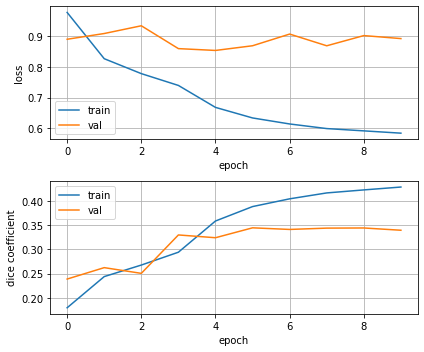

## 7. 모델 테스트 및 Morphological filtering 적용하기

In [58]:
def load_model(ckpt_path, num_classes, device):
    checkpoint = torch.load(ckpt_path, map_location=device)
    model = UNet(num_classes=num_classes)
    model.load_state_dict(checkpoint)
    model = model.to(device)
    model.eval()
    return model

In [60]:
is_cuda = True

NUM_CLASSES = 4
IMAGE_SIZE = 224
DEVICE = torch.device('cuda' if torch.cuda.is_available and is_cuda else 'cpu')

In [62]:
ckpt_path = "./trained_model/model_05.pth"
model = load_model(ckpt_path, NUM_CLASSES, DEVICE)

transformer = transforms.Compose([
            transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
            transforms.ToTensor(),
            transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])])

In [63]:
def morpholocal_process(mask, num_classes, ksize=7):
    new_mask = mask.copy()
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(ksize, ksize))

    for class_index in range(1, num_classes):
        binary_mask = (mask == class_index).astype(np.uint8)
        closing = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
        new_mask[closing.astype(np.bool_)] = class_index
    return new_mask

In [64]:
from utils import CLASS_ID_TO_RGB

In [65]:
def decode_segmap(mask, num_classes):
    mask_H, mask_W = mask.shape
    R_channel = np.zeros((mask_H, mask_W), dtype=np.uint8)
    G_channel = np.zeros((mask_H, mask_W), dtype=np.uint8)
    B_channel = np.zeros((mask_H, mask_W), dtype=np.uint8)

    for class_index in range(1, num_classes):
        R_channel[mask == class_index] = CLASS_ID_TO_RGB[class_index][0]
        G_channel[mask == class_index] = CLASS_ID_TO_RGB[class_index][1]
        B_channel[mask == class_index] = CLASS_ID_TO_RGB[class_index][2]
    
    RGB_mask = cv2.merge((B_channel, G_channel, R_channel))
    return RGB_mask

In [72]:
from PIL import Image

In [78]:
@torch.no_grad()
def predict_segment(image, model, num_classes, device):
    PIL_image = Image.fromarray(image)
    tensor_image = transformer(PIL_image)
    tensor_image = tensor_image.to(device)

    pred_mask = model(torch.unsqueeze(tensor_image, dim=0))
    pred_mask = torch.argmax(pred_mask.squeeze(0).cpu(), dim=0)
    pred_mask = pred_mask.numpy()
    pred_mask = morpholocal_process(pred_mask, num_classes)
    rgb_mask = decode_segmap(pred_mask, num_classes)
    return rgb_mask

In [80]:
video_path = "../DATASET/Segmentation/video/test/ID00411637202309374271828.mp4"
cnt = 0
vidcap = cv2.VideoCapture(video_path)
while (vidcap.isOpened()):
    ret, frame = vidcap.read()

    if ret:
        rgb_mask = predict_segment(frame, model, NUM_CLASSES, DEVICE)
        rgb_mask = cv2.resize(rgb_mask, dsize=frame.shape[:2])
              
        alpha = 0.6
        blend = cv2.addWeighted(frame, alpha, rgb_mask, 1-alpha, 0)
        cv2.imshow('output', blend)
        
        key = cv2.waitKey(1)
        if key == 27:
            break
        if key == ord('s'):
            cv2.waitKey(0)
    else:
        break
        
vidcap.release()
cv2.destroyAllWindows()